In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from numerik import gradient_descent

In [6]:
# specific robot case
def get_position(a, b, l1, l2):
    x = l1 * np.cos(a) + l2 * np.cos(a+b)
    y = l1 * np.sin(a) + l2 * np.sin(a+b)
    return np.array([x, y])

def get_mid_joint_position(a, l1):
    x = l1 * np.cos(a)
    y = l1 * np.sin(a)
    return np.array([x, y])

def fitness_function(a, b, l1, l2, p): # function that needs to be optimized to zero
    return get_position(a, b, l1, l2) - p

def fitness_function_jacobi(a, b, l1, l2):
    return np.array([[-l1 * np.sin(a) - l2 * np.sin(a+b), - l2 * np.sin(a+b)],
                     [l1 * np.cos(a) + l2 * np.cos(a+b), l2 * np.cos(a+b)]])


def get_angles(x, y, l1, l2, x0 = np.array([1., 1.])):# 0,0 does not converge
    f = lambda a: fitness_function(*a, l1, l2, [x, y])
    df = lambda a: fitness_function_jacobi(*a, l1, l2)

    p = gradient_descent.newton(f, df, x0) 
    p = np.mod(p, np.pi*2) # constrain function output to one full rotation
    return p


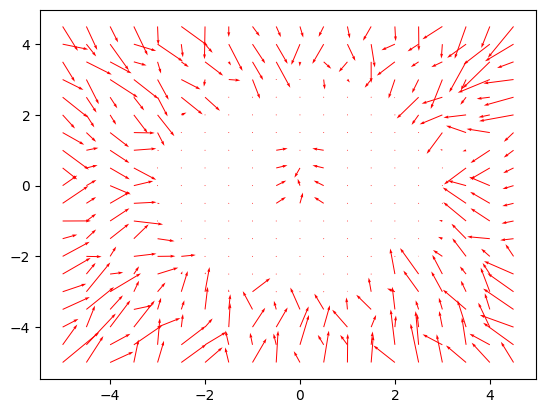

In [7]:
# creating inverse kinematic error gradient field
l1 = 2
l2 = 1

xys = np.mgrid[-5:5:0.5, -5:5:0.5].reshape(2,-1).T
for xy in xys:
    angles = get_angles(*xy, l1, l2)
    positions = get_position(*angles, l1, l2)
    error = xy - positions
    plt.quiver(*xy, *-error, color=['r','b','g'], scale=100, width=0.002)

plt.show()

In [8]:
# define functions for trajectory and for printing robot on plot
def trajectory(t):
    x = -2. + t * 1./(17**(1/2)) * 1
    y = 1. + t * 1./(17**(1/2)) * -4
    return np.array([x, y]).T

def plot_robot(a, b, l1, l2):
    x1 = [0,0]
    x2 = get_mid_joint_position(a, l1)
    x3 = get_position(a, b, l1, l2)
    p = np.array([x1, x2, x3])
    plt.plot(p[:,0], p[:,1], "k-o")

previous_angles = np.array([1., 1.])

@interact(t=(-2, 5, 0.01))
def plot_position(t):
    global previous_angles  # Add this line
    xy = trajectory(t)
    previous_angles = get_angles(*xy, l1, l2, previous_angles)
    
    # plot robot with angles
    plot_robot(*previous_angles, l1, l2)
    print(previous_angles)

    # plot commanded position
    plt.plot(xy[0], xy[1],'ro') 

    # plot trajectory
    ts = np.linspace(0, 4, 100)
    xys = trajectory(ts)
    plt.plot(xys[:,0], xys[:,1], "r")

    plt.xlim([4,-4])
    plt.ylim([4,-4])
    plt.show()


interactive(children=(FloatSlider(value=1.0, description='t', max=5.0, min=-2.0, step=0.01), Output()), _dom_c…